In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("Position_Salaries.csv")

In [26]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [27]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [28]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [29]:
y = y.reshape(len(y), 1)

In [30]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


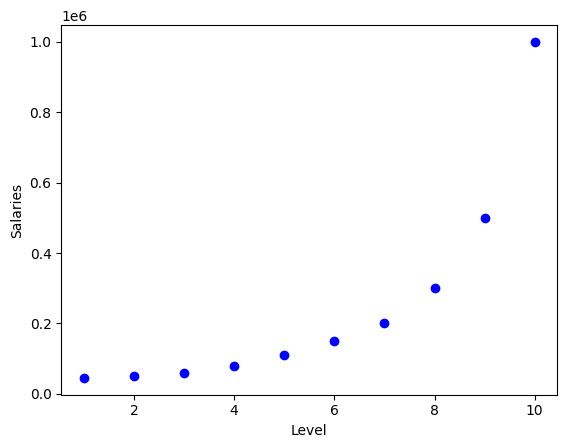

In [32]:
plt.scatter(X, y, color="b")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regressor = PolynomialFeatures(degree=2)
linear_regressor_2 = LinearRegression()
X_poly = poly_regressor.fit_transform(X)
linear_regressor_2.fit(X_poly, y)

LinearRegression()

In [35]:
linear_regressor.predict([[6.5]])

array([[330378.78787879]])

In [36]:
linear_regressor_2.predict(poly_regressor.fit_transform([[6.5]]))

array([[189498.10606061]])

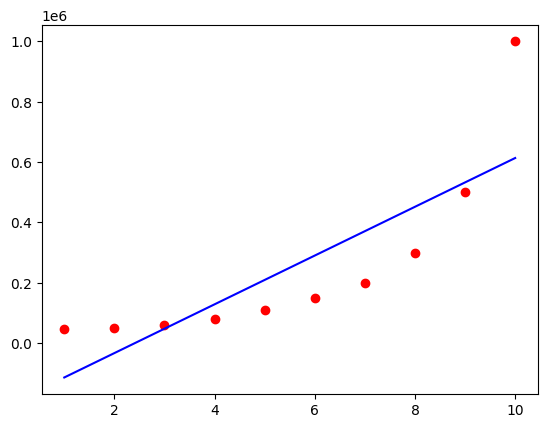

In [37]:
plt.scatter(X, y, color="r")
plt.plot(X, linear_regressor.predict(X), color="b")
plt.show()

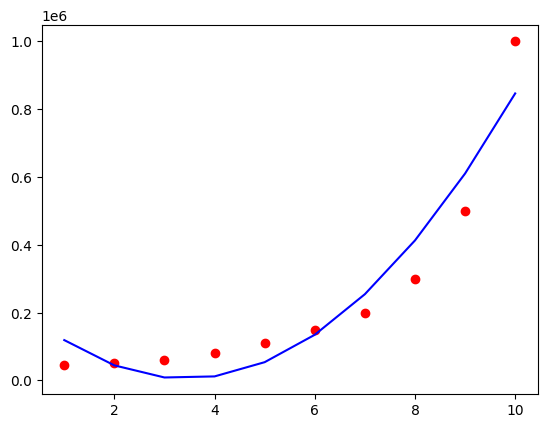

In [38]:
plt.scatter(X, y, color="r")
plt.plot(X, linear_regressor_2.predict(X_poly), color="b")
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [40]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [45]:
sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

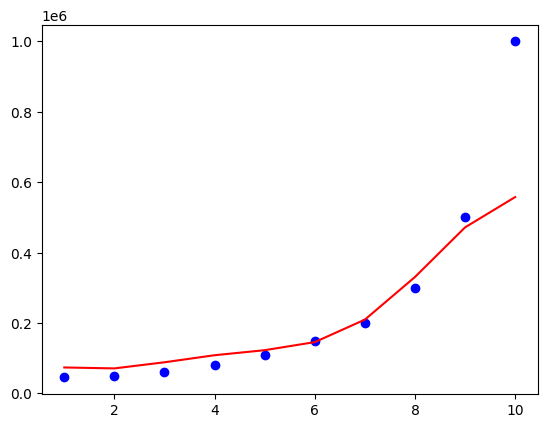

In [51]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="b")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_regressor.predict(X).reshape(-1, 1)), color="r")
plt.show()